# Chapter 11: Testing with Out-of-Sample Data

In [1]:
import sys
import os
sys.path.append('/home/yutanagano/Projects/nnfs')
os.chdir('/home/yutanagano/Projects/nnfs')

In [2]:
import numpy as np
import nnfs
from nnfs.datasets import sine_data, spiral_data

nnfs.init()

import nnn

## Regression

In [3]:
# Create datasets
X, y = sine_data()

model = nnn.module.Module()

# CAdd layers
model.add(nnn.layer.Dense(1, 64))
model.add(nnn.activation.Relu())
model.add(nnn.layer.Dense(64, 64))
model.add(nnn.activation.Relu())
model.add(nnn.layer.Dense(64, 1))
model.add(nnn.activation.Linear())

# Set loss and optimiser objects
model.set(
    loss=nnn.loss.MeanSquaredError(),
    optimiser=nnn.optimiser.Adam(learning_rate=0.005, decay=1e-3),
    accuracy=nnn.accuracy.Regression()
)

model.finalise()

In [4]:
model.train(X, y, epochs=1000, print_every=100)

epoch: 100, acc: 0.006, loss: 0.085, (data_loss: 0.085, reg_loss: 0.000), lr: 0.004549590536851684
epoch: 200, acc: 0.032, loss: 0.035, (data_loss: 0.035, reg_loss: 0.000), lr: 0.004170141784820684
epoch: 300, acc: 0.021, loss: 0.003, (data_loss: 0.003, reg_loss: 0.000), lr: 0.003849114703618168
epoch: 400, acc: 0.611, loss: 0.000, (data_loss: 0.000, reg_loss: 0.000), lr: 0.0035739814152966403
epoch: 500, acc: 0.628, loss: 0.000, (data_loss: 0.000, reg_loss: 0.000), lr: 0.00333555703802535
epoch: 600, acc: 0.733, loss: 0.000, (data_loss: 0.000, reg_loss: 0.000), lr: 0.0031269543464665416
epoch: 700, acc: 0.752, loss: 0.000, (data_loss: 0.000, reg_loss: 0.000), lr: 0.002942907592701589
epoch: 800, acc: 0.780, loss: 0.000, (data_loss: 0.000, reg_loss: 0.000), lr: 0.0027793218454697055
epoch: 900, acc: 0.790, loss: 0.000, (data_loss: 0.000, reg_loss: 0.000), lr: 0.0026329647182727752
epoch: 1000, acc: 0.140, loss: 0.000, (data_loss: 0.000, reg_loss: 0.000), lr: 0.002501250625312656


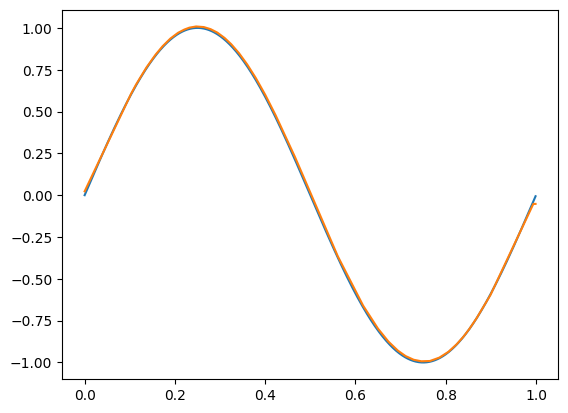

In [5]:
import matplotlib.pyplot as plt

X_test, y_test = sine_data()

output = model.forward(X_test, training=False)

plt.plot(X_test, y_test)
plt.plot(X_test, output)
plt.show()

## Logistic regression

In [6]:
# Create test and train datasets
X, y = spiral_data(samples=100, classes=2)
X_test, y_test = spiral_data(samples=100, classes=2)

y = y.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Instantiate model
model = nnn.module.Module()

model.add(nnn.layer.Dense(2, 64, l2w=5e-4, l2b=5e-4))
model.add(nnn.activation.Relu())
model.add(nnn.layer.Dense(64, 1))
model.add(nnn.activation.Sigmoid())

model.set(
    loss=nnn.loss.BinaryCrossentropy(),
    optimiser=nnn.optimiser.Adam(decay=5e-7),
    accuracy=nnn.accuracy.Categorical(binary=True)
)

model.finalise()

In [7]:
model.train(X, y, validation_data=(X_test, y_test), epochs=10000, print_every=100)

epoch: 100, acc: 0.575, loss: 0.678, (data_loss: 0.677, reg_loss: 0.001), lr: 0.0009999505024501287
epoch: 200, acc: 0.585, loss: 0.674, (data_loss: 0.673, reg_loss: 0.001), lr: 0.0009999005098992651
epoch: 300, acc: 0.575, loss: 0.671, (data_loss: 0.670, reg_loss: 0.001), lr: 0.000999850522346909
epoch: 400, acc: 0.600, loss: 0.665, (data_loss: 0.662, reg_loss: 0.002), lr: 0.0009998005397923115
epoch: 500, acc: 0.615, loss: 0.655, (data_loss: 0.650, reg_loss: 0.004), lr: 0.0009997505622347225
epoch: 600, acc: 0.620, loss: 0.643, (data_loss: 0.637, reg_loss: 0.006), lr: 0.0009997005896733929
epoch: 700, acc: 0.660, loss: 0.631, (data_loss: 0.622, reg_loss: 0.009), lr: 0.0009996506221075735
epoch: 800, acc: 0.695, loss: 0.619, (data_loss: 0.607, reg_loss: 0.011), lr: 0.000999600659536515
epoch: 900, acc: 0.715, loss: 0.606, (data_loss: 0.591, reg_loss: 0.015), lr: 0.0009995507019594694
epoch: 1000, acc: 0.735, loss: 0.593, (data_loss: 0.575, reg_loss: 0.018), lr: 0.000999500749375687
ep

## Multi-class Classification

In [8]:
# Create test and train datasets
X, y = spiral_data(samples=200, classes=3)
X_test, y_test = spiral_data(samples=100, classes=3)

# Instantiate model
model = nnn.module.Module()

model.add(nnn.layer.Dense(2, 64, l2w=5e-4, l2b=5e-4))
model.add(nnn.activation.Relu())
model.add(nnn.layer.Dropout(0.1))
model.add(nnn.layer.Dense(64, 3))
model.add(nnn.activation.Softmax())

model.set(
    loss=nnn.loss.CategoricalCrossEntropy(),
    optimiser=nnn.optimiser.Adam(learning_rate=0.05, decay=5e-5),
    accuracy=nnn.accuracy.Categorical()
)

model.finalise()

In [9]:
model.train(X, y, validation_data=(X_test, y_test), epochs=10000, print_every=100)

epoch: 100, acc: 0.603, loss: 0.896, (data_loss: 0.871, reg_loss: 0.025), lr: 0.04975371909050202
epoch: 200, acc: 0.653, loss: 0.820, (data_loss: 0.783, reg_loss: 0.037), lr: 0.049507401356502806
epoch: 300, acc: 0.613, loss: 0.805, (data_loss: 0.765, reg_loss: 0.040), lr: 0.0492635105177595
epoch: 400, acc: 0.653, loss: 0.757, (data_loss: 0.717, reg_loss: 0.040), lr: 0.04902201088288642
epoch: 500, acc: 0.655, loss: 0.801, (data_loss: 0.760, reg_loss: 0.041), lr: 0.048782867456949125
epoch: 600, acc: 0.685, loss: 0.726, (data_loss: 0.686, reg_loss: 0.041), lr: 0.04854604592455945
epoch: 700, acc: 0.682, loss: 0.736, (data_loss: 0.695, reg_loss: 0.041), lr: 0.048311512633460556
epoch: 800, acc: 0.672, loss: 0.742, (data_loss: 0.701, reg_loss: 0.041), lr: 0.04807923457858551
epoch: 900, acc: 0.668, loss: 0.794, (data_loss: 0.753, reg_loss: 0.041), lr: 0.04784917938657352
epoch: 1000, acc: 0.678, loss: 0.749, (data_loss: 0.708, reg_loss: 0.041), lr: 0.04762131530072861
epoch: 1100, acc: